In [55]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [56]:
from visao import gravar_arquivo_arff, distancia

In [68]:
import os

BASE_PATH = './grape_base/'
black_measles_imgs = os.listdir(BASE_PATH+'black_measles')
black_measles_imgs = [BASE_PATH+'black_measles/'+img for img in black_measles_imgs]

leaf_blight_imgs = os.listdir(BASE_PATH+'leaf_blight')
leaf_blight_imgs = [BASE_PATH+'leaf_blight/'+img for img in leaf_blight_imgs]

black_rot_imgs = os.listdir(BASE_PATH+'black_rot')
black_rot_imgs = [BASE_PATH+'black_rot/'+img for img in black_rot_imgs]

healthy_imgs = os.listdir(BASE_PATH+'healthy')
classes_dict = {}
healthy_imgs = [BASE_PATH+'healthy/'+img for img in healthy_imgs]

In [69]:
def plot_matrix_list(images_list, titles, size_a=16, size_b=16):
    
    lines = (len(images_list)//4)+1
    plt.figure(figsize=(size_a, size_b))
    
    for i in range(len(images_list)):
        plt.subplot(lines,4,i+1)
        plt.title(titles[i])
        plt.gray()
        plt.imshow(images_list[i])
        #plt.title(str(i+1))
        
    
    plt.show()
    plt.close('all')

In [70]:
import numpy as np
#leaf_blight
def aplica_filtro(img_path):
    img = cv2.imread(img_path)
    
    qtdeLinhas, qtdeColunas, c = img.shape
    W = np.zeros((qtdeLinhas,qtdeColunas))
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]

    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 

    H = img[:,:,0]
    S = img[:,:,1]
    V = img[:,:,2]

    THR = 50

    for i in range(qtdeLinhas):
        for j in range(qtdeColunas):
            if(not(((S[i,j] < THR or V[i,j] < THR) or H[i,j] > 100) or (not(B[i,j] < 100)))):
                W[i,j] = 255

    return W

In [72]:
def histograma_tons_cinza(img):#, filtro):   
    W = np.zeros(256)
    qtdeLinhas, qtdeColunas = img.shape
    
    for i in range(qtdeLinhas):
        for j in range(qtdeColunas):
            #if(filtro[i,j]==255):
            W[img[i,j]] = W[img[i,j]] + 1
    
    for i in range(256):
        W[i] = W[i]/(qtdeLinhas*qtdeColunas)
    
    return W

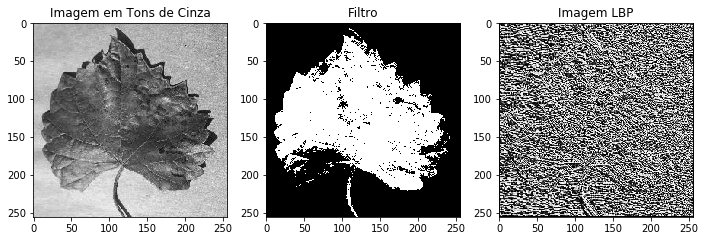

In [61]:
#teste para obter filtro
img = cv2.imread(black_measles_imgs[0], 0)
img_filtro = aplica_filtro(black_measles_imgs[0])
img_lbp = lbp(black_measles_imgs[0])
plot_matrix_list([img, img_filtro, img_lbp], ['Imagem em Tons de Cinza', 'Filtro', 'Imagem LBP'])

In [73]:
def lbp(img_path):
    '''
    aplica convolução ...
    '''
    img = cv2.imread(img_path, 0)
    l, c = img.shape
    img2 = np.zeros((l,c), dtype=int)
    
    for i in range(1,l-1):
        for j in range(1,c-1):
            A = img[i-1,j] #bit mais significativo
            B = img[i-1,j+1]
            C = img[i,j+1]
            D = img[i+1,j+1]
            E = img[i+1,j]
            F = img[i+1,j-1]
            G = img[i,j-1]
            H = img[i-1,j-1]
            Centro = img[i,j]
            soma = 0
            if(A > Centro):
                soma = soma + (2**7)
            if(B > Centro):
                soma = soma + (2**6)
            if(C > Centro):
                soma = soma + (2**5)
            if(D > Centro):
                soma = soma + (2**4)
            if(E > Centro):
                soma = soma + (2**3)
            if(F > Centro):
                soma = soma + (2**2)
            if(G > Centro):
                soma = soma + (2**1)
            if(H > Centro):
                soma = soma + (2**0)
                
            img2[i,j] = soma
    return img2

In [78]:
#imagem base
img_base = cv2.imread(healthy_imgs[0], 0)
#img_filtro = aplica_filtro(healthy_imgs[0])
img_lbp = lbp(black_measles_imgs[0])
hist_base = histograma_tons_cinza(img_lbp)#, img_filtro)

In [79]:
def extrair_caracteristica(img):#, filtro):
    hist = histograma_tons_cinza(img)#, filtro)
    return [distancia(hist, hist_base)]

In [80]:
all_image_paths = [healthy_imgs, black_measles_imgs, leaf_blight_imgs, black_rot_imgs]

base_leaf_deseases = []
classes = []

#extraindo as características das imagens na base de dados
for i in range(len(all_image_paths)):
    for img_path in all_image_paths[i]: 

        #img_filtro = aplica_filtro(img_path)
        img_lbp = lbp(img_path)
        
        caracteristica = extrair_caracteristica(img_lbp)#, img_filtro)
        
        classes.append(i)
        base_leaf_deseases.append((caracteristica, i))
    print('Ending class '+str(i))

gravar_arquivo_arff(base_leaf_deseases, classes) 

Ending class 0
Ending class 1
Ending class 2
Ending class 3
arquivo gravado
